# Ejercicio 1
Implementar el algoritmo de perceptrón simple (sin librerías) con función de
activación escalón y utilizar el mismo para aprender los siguientes problemas:

1. Función AND
2. Función XOR

In [1]:
import sys; sys.path.append("..")

import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

from src.perceptron import PerceptronSimple

In [2]:
def train_and_plot(p, x, y, epochs=30, n_plots=2):    
    fig, ax = plt.subplots(1, n_plots, figsize=(8, 2))
    
    for i in range(n_plots):
        ax[i].scatter(
            [x1 for x1, x2 in x],
            [x2 for x1, x2 in x],
            c=y, s=100
        )
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(-2, 2)
        ax[i].grid()
        decision_line, = ax[i].plot([], [], 'k--')
    
        p.train(x, y, epochs=i*epochs // n_plots)
        w = p.weights
        x1, x2 = -2, 2
        y1 = -(w[1] * x1 + w[0]) / w[2]
        y2 = -(w[1] * x2 + w[0]) / w[2]
        decision_line.set_data([x1, x2], [y1, y2])
    

In [3]:
def predict(p, x, y):
    y_hat = map(p.predict, x)
    
    print("Entrada\t\tReal\tPred.")
    for x_true, y_true, y_pred in zip(x, y, y_hat):
        print("({:>2.0f}, {:>2.0f}):\t{:>2.0f}\t{:>2.0f}".format(*x_true, y_true, y_pred))

## Función AND

* $x = \{(-1, 1), (1, -1), (-1, -1), (1, 1)\}$
* $y = \{-1, -1, -1, 1\}$

In [4]:
x = [(-1, 1), (1, -1), (-1, -1), (1, 1)]
y = [-1, -1, -1, 1]

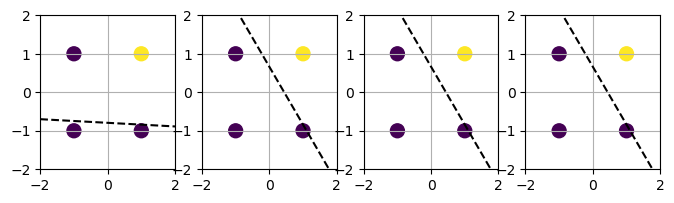

In [5]:
p = PerceptronSimple(input_size=2)
train_and_plot(p, x, y, epochs=16, n_plots=4)

In [6]:
predict(p, x, y)

Entrada		Real	Pred.
(-1,  1):	-1	-1
( 1, -1):	-1	-1
(-1, -1):	-1	-1
( 1,  1):	 1	 1


## Función XOR

* $x = \{(-1, 1), (1, -1), (-1, -1), (1, 1)\}$
* $y = \{1, 1, -1, -1\}$

In [7]:
x = [(-1, 1), (1, -1), (-1, -1), (1, 1)]
y = [1, 1, -1, -1]

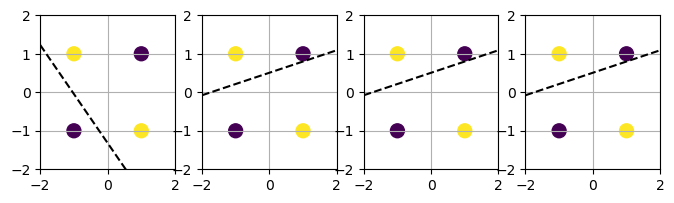

In [8]:
p = PerceptronSimple(input_size=2)
train_and_plot(p, x, y, epochs=16, n_plots=4)

Al no ser linealmente separable este conjunto de datos, siempre obtendremos un elemento mal clasificado.

In [9]:
predict(p, x, y)

Entrada		Real	Pred.
(-1,  1):	 1	-1
( 1, -1):	 1	 1
(-1, -1):	-1	 1
( 1,  1):	-1	-1


# Pregunta

**¿Qué se puede decir acerca de los problemas que puede resolver el perceptrón simple escalón en relación a los problemas lógicos?**

El perceptrón simple solo puede distinguir conjuntos de datos que son linealmente separables.
Para el caso de la función lógica AND, no se encuentra ninguna limitación.
Para el caso de la función lógica XOR, se observa que es imposible que el perceptrón logre aprender correctamente la salida.

Esta limitación esta asociada a la dimension Vapnik–Chervonenkis de cada clasificador.

Para el perceptrón lineal esta dimensión es $VC=3$, es decir solo puede separar hasta 3 puntos que no sean colineales.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/VC1.svg/100px-VC1.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/VC2.svg/100px-VC2.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/VC3.svg/100px-VC3.svg.png)

Para 4 puntos en cambio, ya es imposible la clasificación:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/VC4.svg/100px-VC4.svg.png)